In [5]:
import pandas as pd
pd.options.mode.chained_assignment = None

### __Creating a dataframe with all the data__

In [6]:
data = pd.read_csv('csv_LaRochelle_46.160329_-1.151139_fixed_23_180_PT30M.csv') #Putting the data of the csv into a dataframe
data

,air_temp,albedo,azimuth,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,...,snow_water_equivalent,snow_soiling_rooftop,snow_soiling_ground,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,zenith,period_end,period
0,9,0.13,-4,0,0,0,0,0.0,6.6,0,...,0.0,0,0,221,217,8.4,4.7,157,2014-01-01T00:30:00Z,PT30M
1,9,0.13,-21,0,0,0,0,0.0,6.7,0,...,0.0,0,0,220,216,8.4,4.8,156,2014-01-01T01:00:00Z,PT30M
2,9,0.12,-36,0,0,0,0,0.0,6.9,0,...,0.0,0,0,219,215,8.5,4.9,153,2014-01-01T01:30:00Z,PT30M
3,9,0.12,-49,0,0,0,0,0.0,7.0,0,...,0.0,0,0,219,214,8.6,5.0,150,2014-01-01T02:00:00Z,PT30M
4,9,0.12,-59,0,0,0,0,0.0,7.1,0,...,0.0,0,0,217,212,8.8,5.1,145,2014-01-01T02:30:00Z,PT30M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175339,12,0.15,63,0,0,0,0,88.9,10.0,0,...,0.0,0,0,222,220,14.7,9.6,143,2024-01-01T22:00:00Z,PT30M
175340,12,0.15,54,0,0,0,0,85.9,10.0,0,...,0.0,0,0,219,217,14.3,9.3,148,2024-01-01T22:30:00Z,PT30M
175341,12,0.15,43,0,0,0,0,74.7,9.9,0,...,0.0,0,0,216,214,14.2,9.3,151,2024-01-01T23:00:00Z,PT30M
175342,12,0.15,29,0,0,0,0,87.4,9.7,0,...,0.0,0,0,214,212,14.4,9.4,155,2024-01-01T23:30:00Z,PT30M


### __Creating a new dataframe with only the column relative to the wind and the time.__

In [7]:
#List of columns to keep (wind-related and time-related features)
useful_columns = ['wind_direction_100m', 'wind_direction_10m', 'wind_speed_100m', 'wind_speed_10m', 'period_end']
wind_time_data = data[useful_columns] #Create a new dataframe containing only the useful columns
wind_time_data

,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,period_end
0,221,217,8.4,4.7,2014-01-01T00:30:00Z
1,220,216,8.4,4.8,2014-01-01T01:00:00Z
2,219,215,8.5,4.9,2014-01-01T01:30:00Z
3,219,214,8.6,5.0,2014-01-01T02:00:00Z
4,217,212,8.8,5.1,2014-01-01T02:30:00Z
...,...,...,...,...,...
175339,222,220,14.7,9.6,2024-01-01T22:00:00Z
175340,219,217,14.3,9.3,2024-01-01T22:30:00Z
175341,216,214,14.2,9.3,2024-01-01T23:00:00Z
175342,214,212,14.4,9.4,2024-01-01T23:30:00Z


### __Funtion of the data for the year that we want__

In [8]:
def extract_year_data(year):
    wind_time_data['period_end'] = pd.to_datetime(wind_time_data['period_end']) #Convert 'period_end' to datetime

    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'
    
    #Extract data for the specified year
    one_year_data = wind_time_data[(wind_time_data['period_end'] >= start_date)&(wind_time_data['period_end'] <= end_date)]

    return one_year_data

extract_year_data(2014)


,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,period_end
0,221,217,8.4,4.7,2014-01-01 00:30:00+00:00
1,220,216,8.4,4.8,2014-01-01 01:00:00+00:00
2,219,215,8.5,4.9,2014-01-01 01:30:00+00:00
3,219,214,8.6,5.0,2014-01-01 02:00:00+00:00
4,217,212,8.8,5.1,2014-01-01 02:30:00+00:00
...,...,...,...,...,...
17467,94,95,4.8,2.7,2014-12-30 22:00:00+00:00
17468,96,97,4.9,2.7,2014-12-30 22:30:00+00:00
17469,97,98,5.0,2.7,2014-12-30 23:00:00+00:00
17470,97,99,5.0,2.8,2014-12-30 23:30:00+00:00


### __Plotting wind speed and the direction over time__

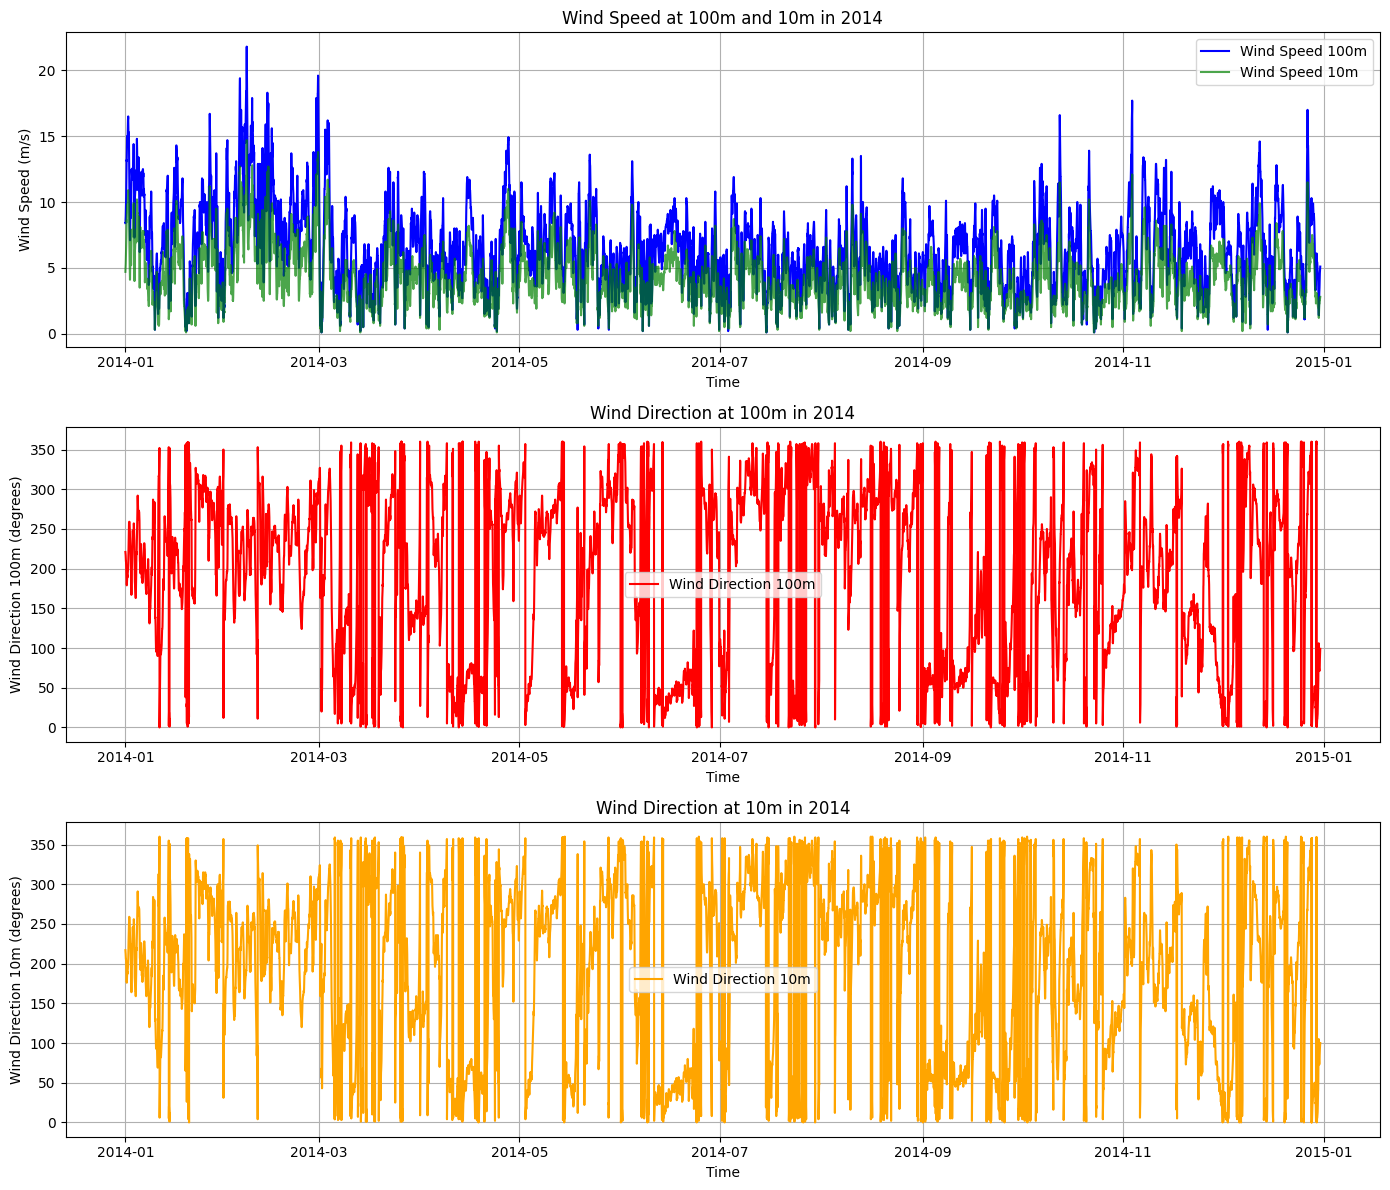

In [9]:
import matplotlib.pyplot as plt

def plot_wind_data(year):
    year_data = extract_year_data(year) #Extract data for the specified year
    
    plt.figure(figsize=(14, 12))

    #Plot wind speed for both heights in the same plot
    plt.subplot(3, 1, 1)
    plt.plot(year_data['period_end'], year_data['wind_speed_100m'], label='Wind Speed 100m', color='blue')
    plt.plot(year_data['period_end'], year_data['wind_speed_10m'], label='Wind Speed 10m', color='green', alpha=0.7)
    plt.xlabel('Time')
    plt.ylabel('Wind Speed (m/s)')
    plt.title(f'Wind Speed at 100m and 10m in {year}')
    plt.grid(True)
    plt.legend()

    #Plot wind direction at 100m
    plt.subplot(3, 1, 2)
    plt.plot(year_data['period_end'], year_data['wind_direction_100m'], label='Wind Direction 100m', color='red')
    plt.xlabel('Time')
    plt.ylabel('Wind Direction 100m (degrees)')
    plt.title(f'Wind Direction at 100m in {year}')
    plt.grid(True)
    plt.legend()

    #Plot wind direction at 10m
    plt.subplot(3, 1, 3)
    plt.plot(year_data['period_end'], year_data['wind_direction_10m'], label='Wind Direction 10m', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Wind Direction 10m (degrees)')
    plt.title(f'Wind Direction at 10m in {year}')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the wind data for the year 2014
plot_wind_data(2014)

### __Computing the number of hours during which the wind was not blowing__

In [10]:
def hours_without_wind(year):
    year_data=extract_year_data(year) #Extract data for the specified year
    time_without_wind=(year_data[(year_data['wind_speed_100m'] == 0) & (year_data['wind_speed_10m'] == 0)].shape[0]) / 2 #COmputing the tiume where the wind was not blowing at 10 and 100 meters
    return f'In {year}, the wind was not blowing during {time_without_wind} hours'
hours_without_wind(2015)

#This result is not interesting, but for the last question of the project, I found a way to turn the same question interesting.

'In 2015, the wind was not blowing during 0.0 hours'

### __Plotting wind speed and direction, month by month__

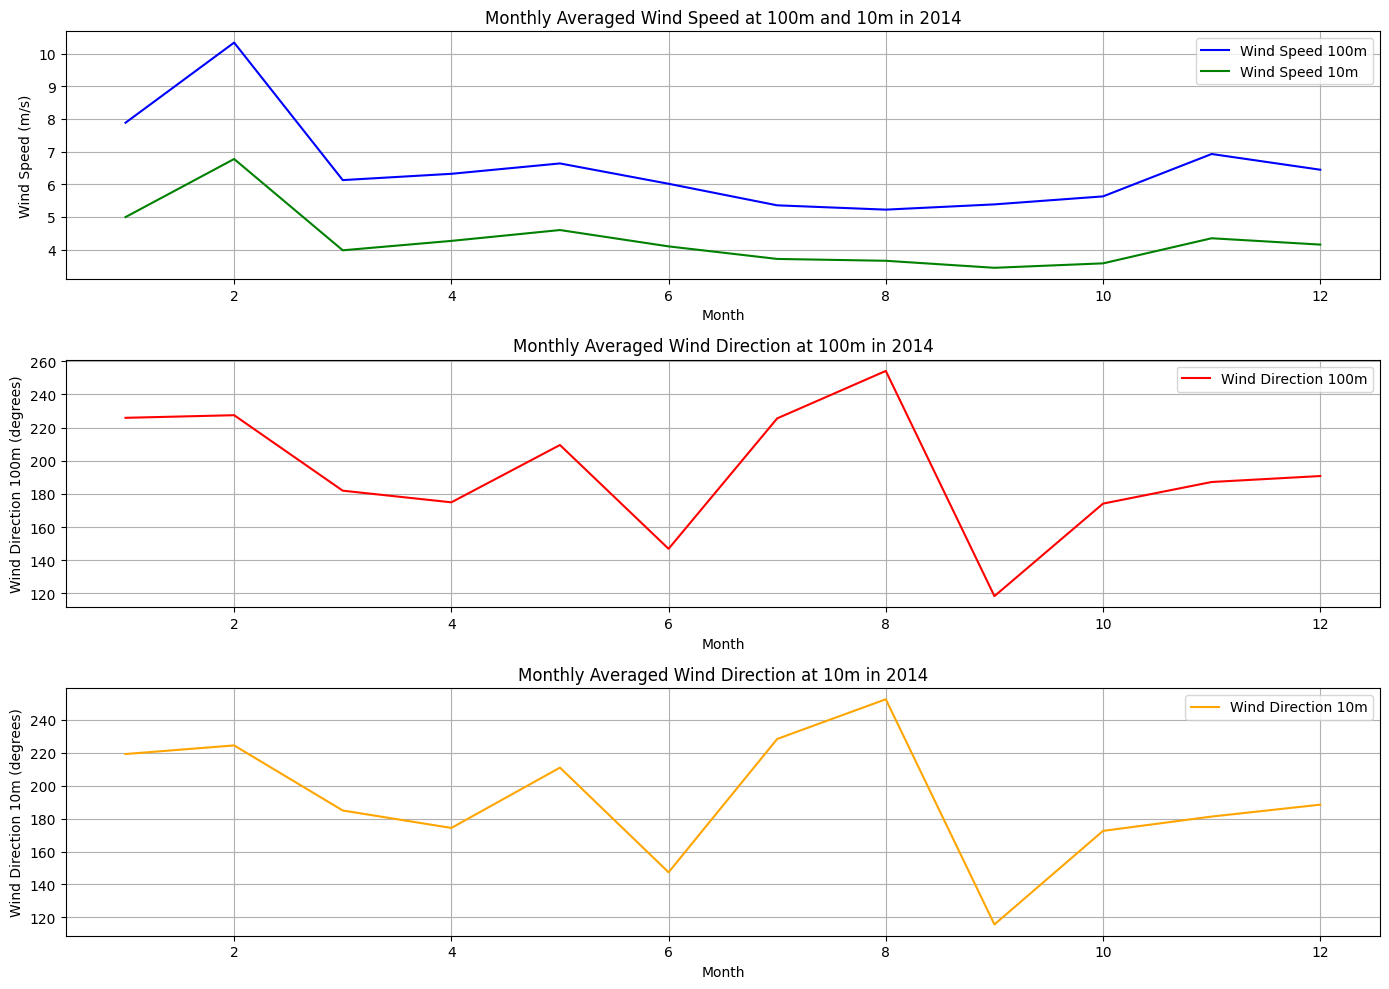

In [11]:
def plot_monthly_averages(year):
    #Extract data for the specified year
    year_data = extract_year_data(year)
    
    #Extract month from 'period_end'
    year_data['month'] = year_data['period_end'].dt.month
    
    #Calculate monthly averages
    monthly_averages = year_data.groupby('month').mean(numeric_only=True)

    #Plot the data
    plt.figure(figsize=(14, 10))

    #Plot wind speed
    plt.subplot(3, 1, 1)
    plt.plot(monthly_averages.index, monthly_averages['wind_speed_100m'], label='Wind Speed 100m', color='blue')
    plt.plot(monthly_averages.index, monthly_averages['wind_speed_10m'], label='Wind Speed 10m', color='green')
    plt.xlabel('Month')
    plt.ylabel('Wind Speed (m/s)')
    plt.title(f'Monthly Averaged Wind Speed at 100m and 10m in {year}')
    plt.grid(True)
    plt.legend()

    #Plot wind direction at 100m
    plt.subplot(3, 1, 2)
    plt.plot(monthly_averages.index, monthly_averages['wind_direction_100m'], label='Wind Direction 100m', color='red')
    plt.xlabel('Month')
    plt.ylabel('Wind Direction 100m (degrees)')
    plt.title(f'Monthly Averaged Wind Direction at 100m in {year}')
    plt.grid(True)
    plt.legend()

    #Plot wind direction at 10m
    plt.subplot(3, 1, 3)
    plt.plot(monthly_averages.index, monthly_averages['wind_direction_10m'], label='Wind Direction 10m', color='orange')
    plt.xlabel('Month')
    plt.ylabel('Wind Direction 10m (degrees)')
    plt.title(f'Monthly Averaged Wind Direction at 10m in {year}')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_monthly_averages(2014)

### __Plotting the wind speed distribution over a year__

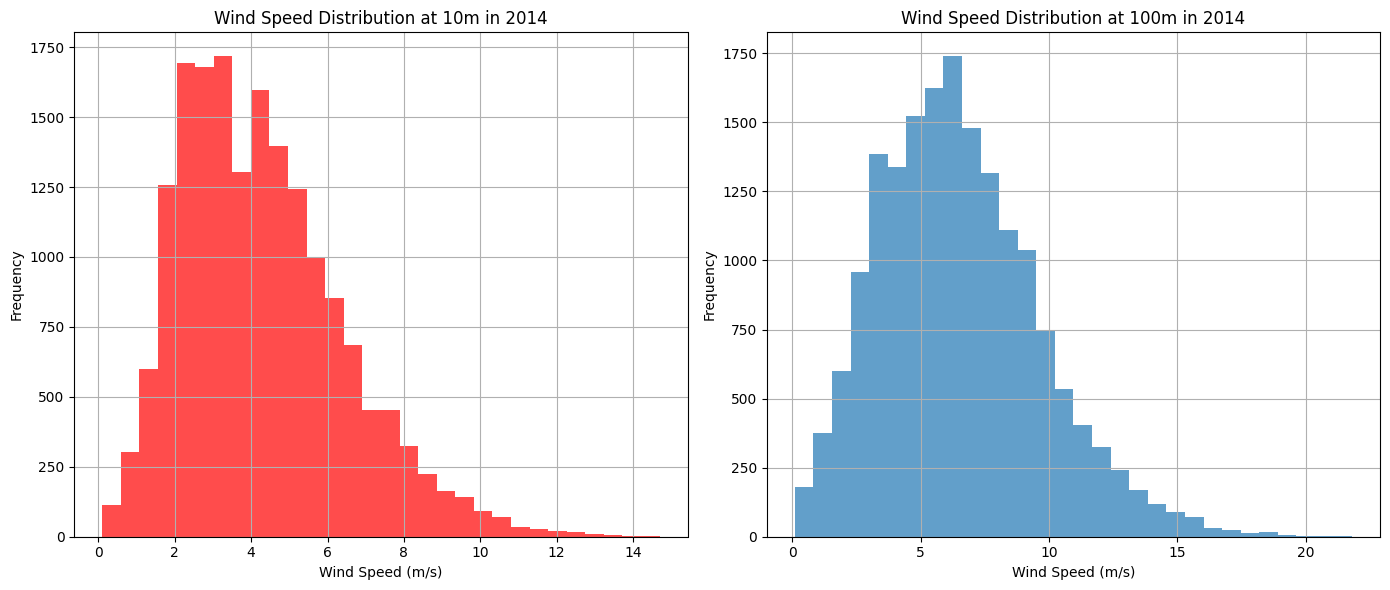

In [12]:
def plot_wind_speed_distribution(year):
    #Extract data for the specified year
    year_data = extract_year_data(year)
    
    plt.figure(figsize=(14, 6))

    #Plot wind speed distribution at 100m
    plt.subplot(1, 2, 2)
    plt.hist(year_data['wind_speed_100m'], bins=30, alpha=0.7)
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Frequency')
    plt.title(f'Wind Speed Distribution at 100m in {year}')
    plt.grid(True)

    #Plot wind speed distribution at 10m
    plt.subplot(1, 2, 1)
    plt.hist(year_data['wind_speed_10m'], bins=30, color='red', alpha=0.7)
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Frequency')
    plt.title(f'Wind Speed Distribution at 10m in {year}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_wind_speed_distribution(2014)

#### __Importing numpy and scipy.stats to help for the weibull distribution__

In [13]:
import numpy as np
from scipy.stats import weibull_min #importing weibull_min for computation

#### __Function to fit Weibull distribution__

In [14]:
def fit_weibull_distribution(data):
    #Fit Weibull distribution to data
    params = weibull_min.fit(data, floc=0)  #Fix location to 0
    shape, loc, scale = params #Extract weibull distribution parameters
    return shape, scale

### __Function to plot wind speed distribution and fit Weibull distribution__

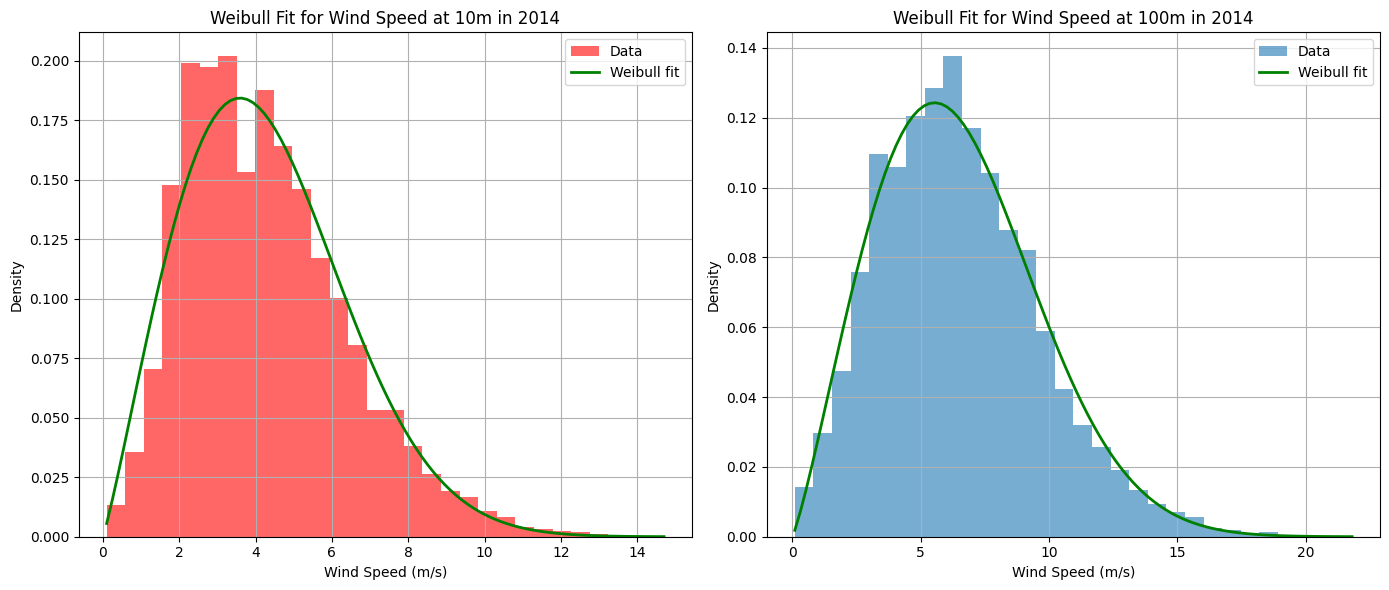

Weibull parameters for wind speed at 10m: Shape factor k = 2.1248916623608194, Scale factor c = 4.846435901724248
Weibull parameters for wind speed at 100m: Shape factor k = 2.185465284967848, Scale factor c = 7.334373180022551


In [15]:
def plot_wind_speed_distribution_and_fit(year):
    
    year_data = extract_year_data(year) #Extract data for the specified year
    
    #Get wind speed data at 10m and 100m
    wind_speed_10m = year_data['wind_speed_10m']
    wind_speed_100m = year_data['wind_speed_100m']
    
    #Fit Weibull distribution to wind speed data
    shape_10m, scale_10m = fit_weibull_distribution(wind_speed_10m)
    shape_100m, scale_100m = fit_weibull_distribution(wind_speed_100m)
    
    #Plot wind speed distribution at 10m
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.hist(wind_speed_10m, bins=30, density=True, alpha=0.6, color='red', label='Data')
    x = np.linspace(wind_speed_10m.min(), wind_speed_10m.max(), 100)
    plt.plot(x, weibull_min.pdf(x, shape_10m, loc=0, scale=scale_10m), 'g-', lw=2, label='Weibull fit') #Plotting thanks to weibull_min.pdf with the parameters that we want
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Density')
    plt.title(f'Weibull Fit for Wind Speed at 10m in {year}')
    plt.legend()
    plt.grid(True)

    #Plot wind speed distribution at 100m
    plt.subplot(1, 2, 2)
    plt.hist(wind_speed_100m, bins=30, density=True, alpha=0.6, label='Data')
    x = np.linspace(wind_speed_100m.min(), wind_speed_100m.max(), 100)
    plt.plot(x, weibull_min.pdf(x, shape_100m, loc=0, scale=scale_100m), 'g-', lw=2, label='Weibull fit') #Plotting thanks to weibull_min.pdf with the parameters that we want
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Density')
    plt.title(f'Weibull Fit for Wind Speed at 100m in {year}')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    #Return the parameters for both heights
    return (shape_10m, scale_10m), (shape_100m, scale_100m)


params_10m, params_100m = plot_wind_speed_distribution_and_fit(2014)

print(f"Weibull parameters for wind speed at 10m: Shape factor k = {params_10m[0]}, Scale factor c = {params_10m[1]}")
print(f"Weibull parameters for wind speed at 100m: Shape factor k = {params_100m[0]}, Scale factor c = {params_100m[1]}")

## __Effect of the wind direction__

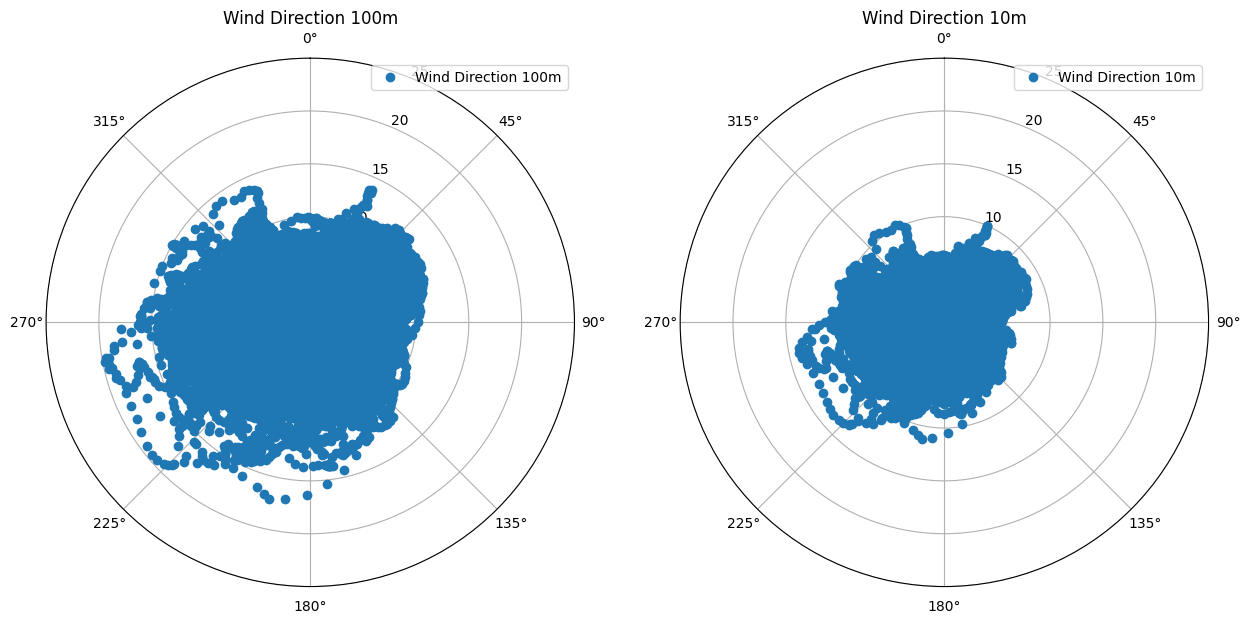

In [16]:
def wind_direction_plot(year):
    wind_time_data = extract_year_data(year)

    #Enter the figure size
    plt.figure(figsize=(15, 10))

    # Polar plot for wind direction at 100m
    ax1 = plt.subplot(1, 2, 1, projection='polar')
    angles_100m = np.deg2rad(wind_time_data['wind_direction_100m'])
    ax1.plot(angles_100m, wind_time_data['wind_speed_100m'], 'o', label='Wind Direction 100m')
    ax1.set_theta_zero_location('N')
    ax1.set_theta_direction(-1)
    ax1.set_title('Wind Direction 100m')
    ax1.legend()
    ax1.set_rlim(0, 25)

    # Polar plot for wind direction at 10m
    ax2 = plt.subplot(1, 2, 2, projection='polar')
    angles_10m = np.deg2rad(wind_time_data['wind_direction_10m'])
    ax2.plot(angles_10m, wind_time_data['wind_speed_10m'], 'o', label='Wind Direction 10m')
    ax2.set_theta_zero_location('N')
    ax2.set_theta_direction(-1)
    ax2.set_title('Wind Direction 10m')
    ax2.legend()
    ax2.set_rlim(0, 25)

    # Show the plots
    plt.show()

wind_direction_plot(2015)

### __Analysis of Wind Direction for Optimal Wind Turbine Installation in La Rochelle__

The wind rose diagrams provided show the wind direction distribution at 100 meters and 10 meters. This analysis will use these diagrams to determine the optimal placement of wind turbines in La Rochelle.

#### Key Considerations:

1. **Predominant Wind Direction**:
   - The wind rose diagrams indicate that the wind predominantly comes from the southwest (around 225°).
   - **Action**: Align the turbines to face the southwest to maximize energy capture.

2. **Wind Speed Distribution**:
   - The diagrams show higher wind speeds from the southwest.
   - **Action**: Orient turbines to optimize exposure to these higher wind speeds.

3. **Spacing and Positioning**:
   - Adequate spacing is necessary to minimize wake effects, where downstream turbines operate in the disturbed wind flow from upstream turbines.
   - **Action**: Place turbines in a staggered formation aligned with the southwest direction to reduce turbulence and shadowing effects.

4. **Height Considerations**:
   - Wind speeds are generally higher at 100 meters compared to 10 meters.
   - **Action**: Use turbines designed for higher altitudes to capture stronger winds at 100 meters.

5. **Local Topography**:
   - Consider the local landscape and any obstacles that could disrupt wind flow.
   - **Action**: Position turbines in open, elevated areas to avoid disruptions and maximize efficiency.

By incorporating these considerations, La Rochelle can maximize wind energy capture and efficiency.


# __PART 2__

## __Computing u_star, and the wind speeds associated to the height of each turbine__

In [17]:
#Constants
k = 0.41  #Von Kármán constant
z0 = 0.1  #The roughness length is hard to estimate for La Rochelle, because the terrain vary a lot. It is at the same time a costal city, a dense urban, and a less dense suburban
#We will then estimate this as 0.1m, because it's mainly a coastal city
d = 12*(2/3)  #The zero-plane displacement : After studying La Rochelle, we guess that the height of buildings really depends on if we're in dense urban or in suburban
#We will then estimate this as 12m


#We take 100m the the ref height and ref speed because it gave the most relevant values and rresults
height_reference = 100
speed_reference = wind_time_data['wind_speed_100m']

#Calculate u_star (friction velocity)
u_star = speed_reference * k / np.log((height_reference - d) / z0)


#Function to calculate wind speed at a given height using u_star
def calculate_wind_speed_at_height(u_star, target_height, z0, d, k):
    return u_star / k * np.log((target_height - d) / z0)

#Calculate wind speeds at turbine heights
wind_time_data['friction_velocity'] = u_star
wind_time_data['wind_speed_Alstom_ECO122'] = calculate_wind_speed_at_height(u_star, 89, z0, d, k)
wind_time_data['wind_speed_Enercon_E33'] = calculate_wind_speed_at_height(u_star, 50, z0, d, k)
wind_time_data['wind_speed_Aventa_AV7'] = calculate_wind_speed_at_height(u_star, 18, z0, d, k)

#You can chose a year for which you want to display the new features
def display_wind_speed_turbines(year):
    turbine_data=extract_year_data(year)
    return turbine_data[['wind_speed_Alstom_ECO122', 'wind_speed_Enercon_E33', 'wind_speed_Aventa_AV7','wind_speed_100m','friction_velocity']]
display_wind_speed_turbines(2014)




,wind_speed_Alstom_ECO122,wind_speed_Enercon_E33,wind_speed_Aventa_AV7,wind_speed_100m,friction_velocity
0,8.243260,7.434842,5.668422,8.4,0.504662
1,8.243260,7.434842,5.668422,8.4,0.504662
2,8.341394,7.523352,5.735903,8.5,0.510670
3,8.439528,7.611862,5.803384,8.6,0.516677
4,8.635796,7.788882,5.938347,8.8,0.528693
...,...,...,...,...,...
17467,4.710434,4.248481,3.239098,4.8,0.288378
17468,4.808568,4.336991,3.306579,4.9,0.294386
17469,4.906702,4.425501,3.374061,5.0,0.300394
17470,4.906702,4.425501,3.374061,5.0,0.300394


### __Operating hours, total power production and capacity factor of each turbine__

In [18]:

#Power curves for the turbines
power_curve_alstom = {
    1: 0, 2: 0, 3: 29, 4: 171, 5: 389, 6: 703, 7: 1139, 8: 1682, 9: 2205, 10: 2541,
    11: 2669, 12: 2697, 13: 2700, 14: 2700, 15: 2700, 16: 2700, 17: 2700, 18: 2700,
    19: 2700, 20: 2700, 21: 2700, 22: 2700, 23: 2700, 24: 2700, 25: 2700, 26: 0,
    27: 0, 28: 0, 29: 0, 30: 0
}

power_curve_enercon = {
    1: 0, 2: 0, 3: 5, 4: 13.7, 5: 30, 6: 55, 7: 92, 8: 138, 9: 196, 10: 250,
    11: 292.8, 12: 320, 13: 335, 14: 335, 15: 335, 16: 335, 17: 335, 18: 335,
    19: 335, 20: 335, 21: 335, 22: 335, 23: 335, 24: 335, 25: 335, 26: 0,
    27: 0, 28: 0, 29: 0, 30: 0
}

power_curve_aventa = {
    1: 0, 2: 0.1, 3: 0.7, 4: 1.5, 5: 3.1, 6: 5.8, 7: 6.2, 8: 6.2, 9: 6.2, 10: 6.2,
    11: 6.2, 12: 6.2, 13: 6.2, 14: 6.2, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0,
    21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0
}

#Add power production columns based on the power curves
def get_power(wind_speed, power_curve):
    wind_speed = round(wind_speed)
    return power_curve.get(wind_speed, 0)

wind_time_data['power_Alstom_ECO122'] = wind_time_data['wind_speed_Alstom_ECO122'].apply(lambda x: get_power(x, power_curve_alstom))
wind_time_data['power_Enercon_E33'] = wind_time_data['wind_speed_Enercon_E33'].apply(lambda x: get_power(x, power_curve_enercon))
wind_time_data['power_Aventa_AV7'] = wind_time_data['wind_speed_Aventa_AV7'].apply(lambda x: get_power(x, power_curve_aventa))

def new_data(year):
    wind_time_data_year = extract_year_data(year)

    #Calculate operating hours for each turbine
    operating_hours_alstom = (wind_time_data_year['power_Alstom_ECO122'] > 0).sum() * 0.5  # Each time period is 0.5 hours
    operating_hours_enercon = (wind_time_data_year['power_Enercon_E33'] > 0).sum() * 0.5
    operating_hours_aventa = (wind_time_data_year['power_Aventa_AV7'] > 0).sum() * 0.5

    #Calculate total power production in kWh/year for each turbine
    total_power_alstom = wind_time_data_year['power_Alstom_ECO122'].sum() * 0.5  # Each time period is 0.5 hours
    total_power_enercon = wind_time_data_year['power_Enercon_E33'].sum() * 0.5
    total_power_aventa = wind_time_data_year['power_Aventa_AV7'].sum() * 0.5

    #Rated power of each turbine
    rated_power_alstom = 2700  #kW
    rated_power_enercon = 335  #kW
    rated_power_aventa = 6.2  #kW
    hours_in_year = 8760

    #Calculate capacity factor for each turbine
    capacity_factor_alstom = total_power_alstom / (rated_power_alstom * hours_in_year)
    capacity_factor_enercon = total_power_enercon / (rated_power_enercon * hours_in_year)
    capacity_factor_aventa = total_power_aventa / (rated_power_aventa * hours_in_year)    


    #Store the results
    L_data = [operating_hours_alstom,operating_hours_enercon,operating_hours_aventa,total_power_alstom,total_power_enercon,total_power_aventa,capacity_factor_alstom,capacity_factor_enercon,capacity_factor_aventa]
    
    #Return the result list
    return L_data

#Displaying all the results
def display(year):
    print(f"\nAlstom ECO122 Operating Hours in {year} : {new_data(year)[0]} hours")
    print(f"Enercon E33 Operating Hours in {year} : {new_data(year)[1]} hours")
    print(f"Aventa AV7 Operating Hours in {year} : {new_data(year)[2]} hours")

    print(f"\nAlstom ECO122 Total Power Production in {year} : {new_data(year)[3]:.2f} kWh/year")
    print(f"Enercon E33 Total Power Production in {year} : {new_data(year)[4]:.2f} kWh/year")
    print(f"Aventa AV7 Total Power Production in {year} : {new_data(year)[5]:.2f} kWh/year")

    print(f"\nAlstom ECO122 Capacity Factor in {year} : {new_data(year)[6] * 100:.2f}%")
    print(f"Enercon E33 Capacity Factor in {year} : {new_data(year)[7] * 100:.2f}%")
    print(f"Aventa AV7 Capacity Factor in {year} : {new_data(year)[8] * 100:.2f}%")


display(2014)



Alstom ECO122 Operating Hours in 2014 : 7961.5 hours
Enercon E33 Operating Hours in 2014 : 7758.5 hours
Aventa AV7 Operating Hours in 2014 : 8157.5 hours

Alstom ECO122 Total Power Production in 2014 : 9008531.00 kWh/year
Enercon E33 Total Power Production in 2014 : 667883.25 kWh/year
Aventa AV7 Total Power Production in 2014 : 22621.80 kWh/year

Alstom ECO122 Capacity Factor in 2014 : 38.09%
Enercon E33 Capacity Factor in 2014 : 22.76%
Aventa AV7 Capacity Factor in 2014 : 41.65%


### __Plotting the capacity factor as a function of the month, and the year__

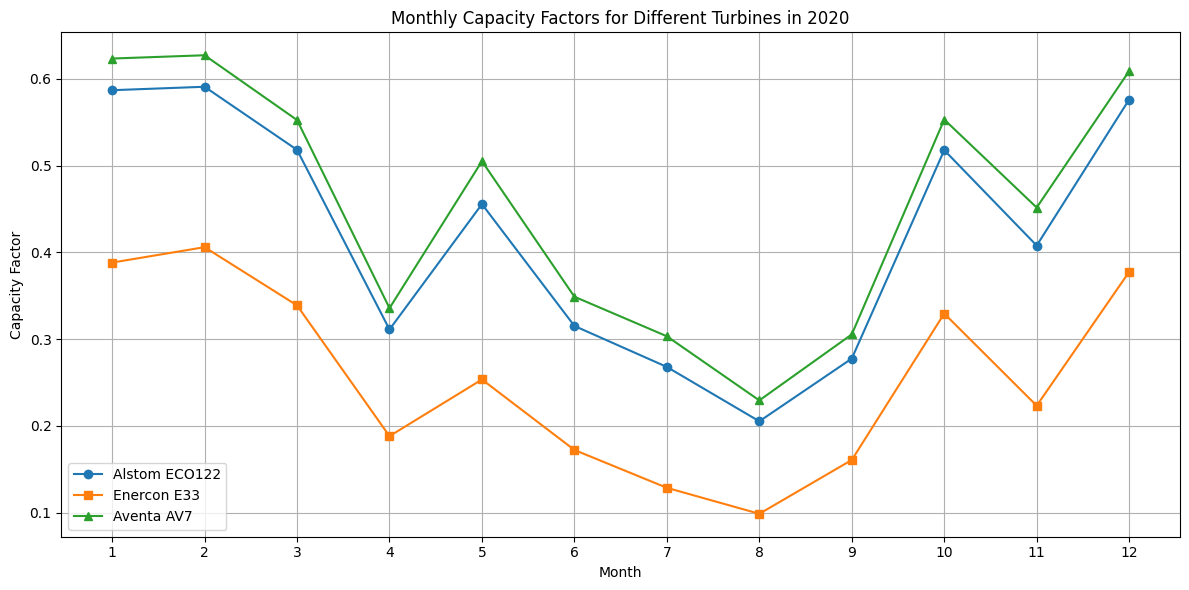

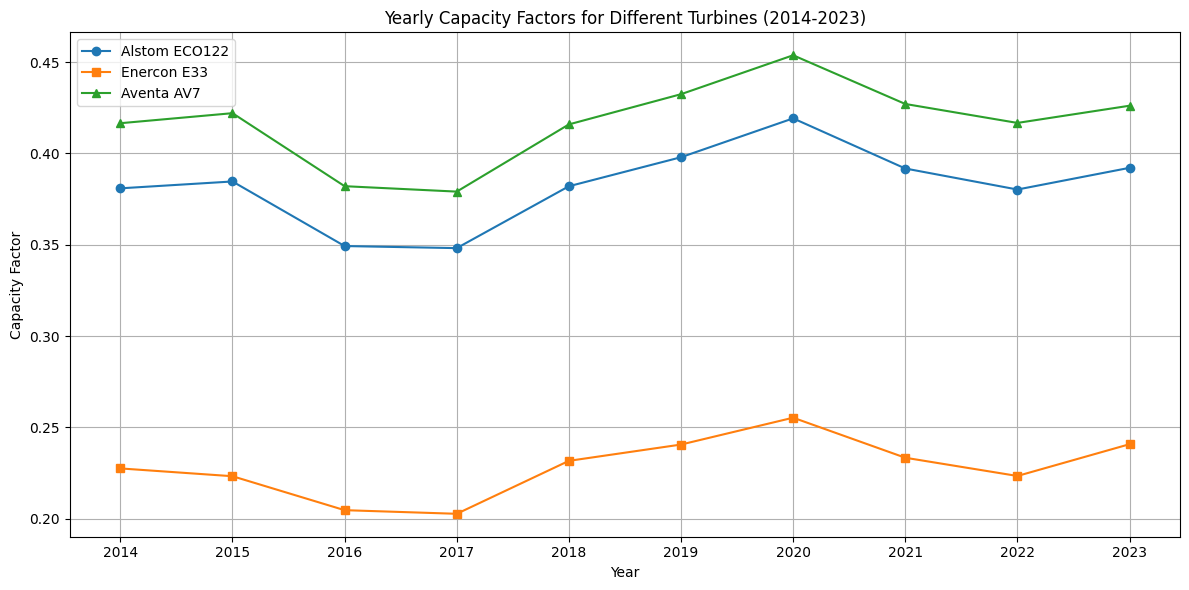

In [19]:
def capacity_factor_over_month(year):
    wind_time_data_year = extract_year_data(year)

    rated_power_alstom = 2700  #kW
    rated_power_enercon = 335  #kW
    rated_power_aventa = 6.2  #kW
    hours_in_month = 730  #Approximate number of hours in a month

    wind_time_data_year['month'] = wind_time_data_year['period_end'].dt.month

    #Calculate monthly power production and capacity factors
    monthly_power_alstom = wind_time_data_year.groupby('month')['power_Alstom_ECO122'].sum() * 0.5
    monthly_power_enercon = wind_time_data_year.groupby('month')['power_Enercon_E33'].sum() * 0.5
    monthly_power_aventa = wind_time_data_year.groupby('month')['power_Aventa_AV7'].sum() * 0.5

    monthly_capacity_factor_alstom = monthly_power_alstom / (rated_power_alstom * hours_in_month)
    monthly_capacity_factor_enercon = monthly_power_enercon / (rated_power_enercon * hours_in_month)
    monthly_capacity_factor_aventa = monthly_power_aventa / (rated_power_aventa * hours_in_month)

    #Months for the x-axis
    months = list(range(1, 13))

    #Enter the figure size
    plt.figure(figsize=(12, 6))

    #Creating the plot
    plt.plot(months, monthly_capacity_factor_alstom, marker='o', label='Alstom ECO122')
    plt.plot(months, monthly_capacity_factor_enercon, marker='s', label='Enercon E33')
    plt.plot(months, monthly_capacity_factor_aventa, marker='^', label='Aventa AV7')

    #Adding labels and title
    plt.xlabel('Month')
    plt.ylabel('Capacity Factor')
    plt.title(f'Monthly Capacity Factors for Different Turbines in {year}')
    plt.xticks(months)
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

capacity_factor_over_month(2020)



#Defining the years between which we plot
first_year=2014
last_year=2023

#Creating a list composed of all the capacity factors of the alstom turbine over the years
capacity_factor_list_alstom=[]
for year in range (first_year,last_year+1):
    capacity_factor_year = new_data(year)[-3] #Using what the previous function new_data return to get the capacity factor for a specific year
    capacity_factor_list_alstom.append(capacity_factor_year)

#Creating a list composed of all the capacity factors of the enercon turbine over the years
capacity_factor_list_enercon=[]
for year in range (first_year,last_year+1):
    capacity_factor_year = new_data(year)[-2] #Using what the previous function new_data return to get the capacity factor for a specific year
    capacity_factor_list_enercon.append(capacity_factor_year)

#Creating a list composed of all the capacity factors of the aventa turbine over the years
capacity_factor_list_aventa=[]
for year in range (first_year,last_year+1):
    capacity_factor_year = new_data(year)[-1] #Using what the previous function new_data return to get the capacity factor for a specific year
    capacity_factor_list_aventa.append(capacity_factor_year)

#Years for the x-axis
years = list(range(first_year, last_year+1))

#Plot (like usually)
plt.figure(figsize=(12, 6))

plt.plot(years, capacity_factor_list_alstom, marker='o', label='Alstom ECO122')
plt.plot(years, capacity_factor_list_enercon, marker='s', label='Enercon E33')
plt.plot(years, capacity_factor_list_aventa, marker='^', label='Aventa AV7')

plt.xlabel('Year')
plt.ylabel('Capacity Factor')
plt.title(f'Yearly Capacity Factors for Different Turbines ({first_year}-{last_year})')
plt.xticks(years)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

</br>

## __Question 1 : Wind Turbine Analysis for Powering La Rochelle__

This analysis aims to determine the number of wind turbines required to safely power the town using only wind turbines.

### Step 1: Determine the Energy Consumption of La Rochelle
The annual energy consumption of the town is **162,688,529 kWh** (or **162,688.529 MWh**). Source : (https://www.hellowatt.fr/suivi-consommation-energie/enedis/charente-maritime/la-rochelle#:~:text=%C3%80%20combien%20s%C3%A9l%C3%A8ve%20la,des%20citoyens%20%C3%A0%20La%20Rochelle%20%3F&text=Dans%20la%20commune%2C%20les%20Rochellois,688%20529%20kWh%20au%20total)


### Step 2

In [20]:
# Step 2: Calculate the Energy Production of Each Turbine
# Assumptions for turbine specifications
rated_power_alstom = 2.7  #MW
rated_power_enercon = 0.335  #MW
rated_power_aventa = 0.0062  #MW

# Hours in a year
hours_in_year = 8760

def energy(year):
    capacity_factor_alstom = new_data(year)[-3] #Using what the previous function new_data return to get the capacity factor for a specific year
    capacity_factor_enercon = new_data(year)[-2] #Using what the previous function new_data return to get the capacity factor for a specific year
    capacity_factor_aventa = new_data(year)[-1] #Using what the previous function new_data return to get the capacity factor for a specific year


    #Annual energy production for each turbine type
    annual_energy_alstom = rated_power_alstom * capacity_factor_alstom * hours_in_year  #MWh
    annual_energy_enercon = rated_power_enercon * capacity_factor_enercon * hours_in_year  #MWh
    annual_energy_aventa = rated_power_aventa * capacity_factor_aventa * hours_in_year  #MWh

    #La Rochelle's annual energy consumption in MWh
    annual_energy_consumption = 162688.529  #MWh

    #Number of turbines required (using ceiling division)
    num_turbines_alstom = -(-annual_energy_consumption // annual_energy_alstom)
    num_turbines_enercon = -(-annual_energy_consumption // annual_energy_enercon)
    num_turbines_aventa = -(-annual_energy_consumption // annual_energy_aventa)

    return num_turbines_alstom,num_turbines_enercon,num_turbines_aventa

#Display the results in markdown format
from IPython.display import Markdown, display

markdown_text = f"""
### Step 3: Compare the Energy Needs with the Energy Production
To safely power the town with only wind turbines, you would need:
- **{int(energy(year)[0])} Alstom ECO122 turbines** or
- **{int(energy(year)[1])} Enercon E33 turbines** or
- **{int(energy(year)[2])} Aventa AV7 turbines**
"""

display(Markdown(markdown_text))


### Step 3: Compare the Energy Needs with the Energy Production
To safely power the town with only wind turbines, you would need:
- **18 Alstom ECO122 turbines** or
- **231 Enercon E33 turbines** or
- **7031 Aventa AV7 turbines**



</br>

## __Question 2 : Choosing the Optimal Wind Turbines for La Rochelle__


__To power the city of La Rochelle with wind turbines, we need to consider cost, feasibility, and urban constraints. Here's an analysis of the three types of turbines:__

### __Alstom ECO122__
- Number Needed: 18
- Initial Cost: $90,000,000
- Annual Maintenance Cost: $7,350,000
- Advantages: High capacity, fewer turbines needed, efficient land use.
- Disadvantages: High initial cost, significant visual impact.

### __Enercon E33__
- Number Needed: 222
- Initial Cost: $22,200,000
- Annual Maintenance Cost: $436,000
- Advantages: Moderate cost, less visually intrusive.
- Disadvantages: More turbines required, higher cumulative maintenance costs.

### __Aventa AV7__
- Number Needed: 6,373
- Initial Cost: $127,460,000
- Annual Maintenance Cost: $46,640,000
- Advantages: Low cost per turbine.
- Disadvantages: Impractical in urban settings due to the vast number required, significant land use, and high visual impact.

### __Recommendation__

For the city of La Rochelle, the Alstom ECO122 appears to be the optimal choice. Despite having an initial cost way superior to the Enercon, it offers significant advantages in terms of high capacity, efficient land use, and fewer turbines needed which is a biggest advantage compared to the number of turbines we would need chosing the Aventa. This translates to less visual clutter, lower complexity in maintenance, and way better overall efficiency than the Enercon. The higher initial investment is justified by the long-term benefits of reduced maintenance complexity and efficient energy production.

</br>

## __Question 3 : Storing capacity needed to deal with periods without wind__

In [21]:
#Define the period without wind
def calculate_storage_capacity(wind_speed_threshold, consecutive_days, hours_per_day_without_wind):
    wind_time_data['day'] = wind_time_data['period_end'].dt.date
    wind_time_data['hour'] = wind_time_data['period_end'].dt.hour
    
    #Count hours per day where wind speed is below the threshold
    low_wind_hours = wind_time_data[wind_time_data['wind_speed_100m'] < wind_speed_threshold].groupby('day').size()
    
    #Find days with low wind hours exceeding the specified threshold
    low_wind_days = low_wind_hours[low_wind_hours >= hours_per_day_without_wind].index
    
    #Identify consecutive low wind periods
    consecutive_periods = []
    current_streak = []
    
    for day in sorted(low_wind_days):
        if current_streak and (day - current_streak[-1]).days == 1:
            current_streak.append(day)
        else:
            if len(current_streak) >= consecutive_days:
                consecutive_periods.append(current_streak)
            current_streak = [day]
    
    if len(current_streak) >= consecutive_days:
        consecutive_periods.append(current_streak)
    
    #Find the longest period without wind
    longest_period = max(consecutive_periods, key=len, default=[])
    longest_period_days = len(longest_period)
    
    #Calculate required storage capacity
    daily_consumption = 162688.529 / 365  #MWh/day
    storage_capacity = daily_consumption * longest_period_days  #MWh
    
    return storage_capacity, longest_period, longest_period_days

#Define parameters
wind_speed_threshold = 4  #m/s
consecutive_days = 5
hours_per_day_without_wind = 16

#Calculate storage capacity
storage_capacity, longest_period, longest_period_days = calculate_storage_capacity(wind_speed_threshold, consecutive_days, hours_per_day_without_wind)

#Display results in markdown format
from IPython.display import Markdown, display

markdown_text = f"""
### Storage Capacity Calculation

To deal with periods without wind, where a period without wind is defined as an interval of at least {consecutive_days} consecutive days with at least {hours_per_day_without_wind} hours out of 24 where the wind speed is inferior to {wind_speed_threshold} m/s, the required storage capacity is calculated as follows:

- **Daily energy consumption of La Rochelle**: {162688.529 / 365:.2f} MWh
- **Required storage capacity for the longest period ({longest_period_days} days)**: {storage_capacity:.2f} MWh

#### Longest period without wind identified:
- {longest_period[0]} to {longest_period[-1]} ({longest_period_days} days)
"""

display(Markdown(markdown_text))



### Storage Capacity Calculation

To deal with periods without wind, where a period without wind is defined as an interval of at least 5 consecutive days with at least 16 hours out of 24 where the wind speed is inferior to 4 m/s, the required storage capacity is calculated as follows:

- **Daily energy consumption of La Rochelle**: 445.72 MWh
- **Required storage capacity for the longest period (9 days)**: 4011.50 MWh

#### Longest period without wind identified:
- 2020-08-04 to 2020-08-12 (9 days)


### What 4,011.50MWH represents ?

4,011.50 MWh is an enormous capacity! In fact, the world's largest battery, the Moss Landing Energy Storage Facility in California, has a capacity of 3,000 MWh. A battery park of this size is extremely expensive and occupies a significant amount of space, making it an impractical solution for the city of La Rochelle today. Additionally, lithium batteries have a known risk of catching fire, as evidenced by incidents like the one at Moss Landing (https://sciencepost.fr/moss-landing-packs-de-batteries-incendies/). While this might become a viable solution in the future, it is not feasible at present.

### __As a conclusion, for now, we can't produce and store enough energy just with the wind to meet the city's needs.__